In [19]:
import pandas as pd
import numpy as np

In [65]:
df2 = pd.read_csv('bmi.csv')
df2.head(7)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5


In [15]:
import seaborn as sns

<AxesSubplot:>

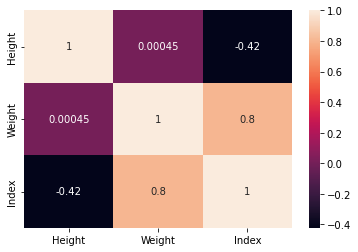

In [20]:
sns.heatmap(df2.corr(),annot = True)

In [24]:
import matplotlib.pyplot as plt

(array([ 13.,   0.,  22.,   0.,  69.,   0.,  68.,   0., 130., 198.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

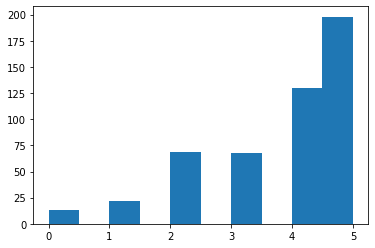

In [26]:
plt.hist(df2['Index'])

(array([ 13.,  22.,  69.,  68., 328.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

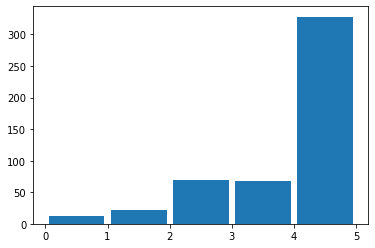

In [34]:
plt.hist(df2['Index'], bins = 5, rwidth = 0.9)

In [37]:
df2_men = df2[df2['Gender'] == 'Male']
df2_men

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
...,...,...,...,...
487,Male,187,80,2
488,Male,198,136,4
494,Male,152,98,5
498,Male,150,95,5


In [38]:
df2_female = df2[df2['Gender'] == 'Female']
df2_female

,Gender,Height,Weight,Index
2,Female,185,110,4
3,Female,195,104,3
9,Female,169,103,4
11,Female,159,80,4
12,Female,192,101,3
...,...,...,...,...
492,Female,198,50,0
493,Female,170,53,1
495,Female,150,153,5
496,Female,184,121,4


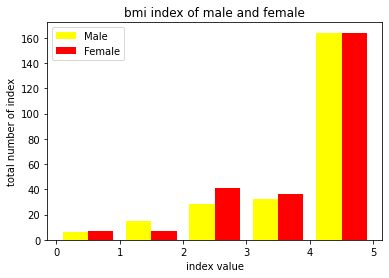

In [44]:
plt.hist([df2_men['Index'],df2_female['Index']], bins = [0, 1, 2, 3, 4,5], color = ['yellow', 'red'], label = ['Male', 'Female'])
plt.xlabel('index value')
plt.ylabel('total number of index')
plt.title('bmi index of male and female')
plt.legend()
plt.show()

In [46]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [66]:
gender = LabelEncoder()
df2['Gender'] = gender.fit_transform(df2['Gender'])
df2.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [68]:
bins = (-1,0,1,2,3,4,5)
index = ('Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obesity', 'Extreme Obesity')
df2['Index'] = pd.cut(df2['Index'], bins = bins, labels = index)

In [73]:
df2['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Index', ylabel='count'>

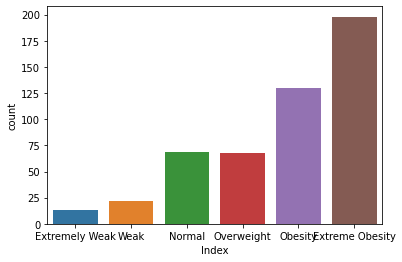

In [77]:
sns.countplot(df2['Index'])

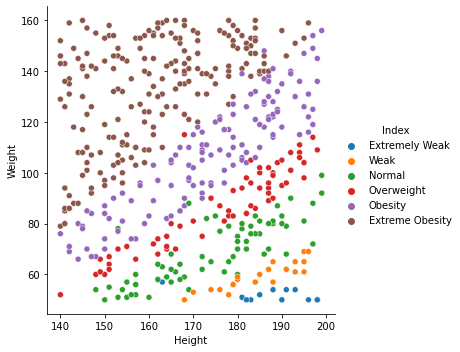

In [81]:
sns.relplot(x = 'Height', y = 'Weight', hue = 'Index', data = df2)

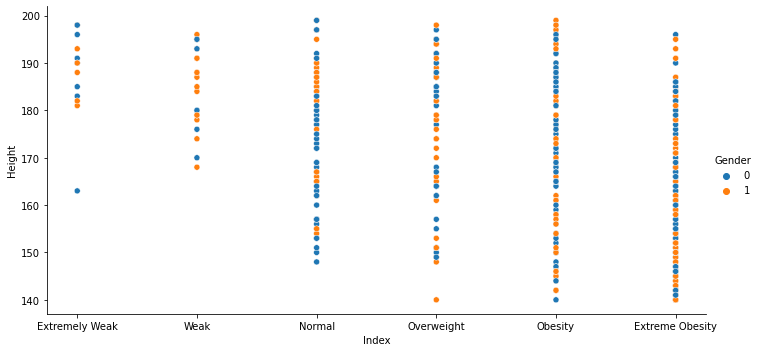

In [86]:
sns.relplot(x = 'Index', y = 'Height', hue = 'Gender', data = df2, height = 5, aspect = 2)

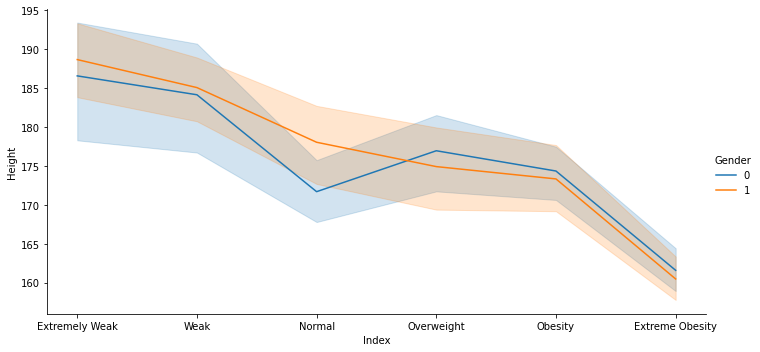

In [89]:
sns.relplot(x = 'Index', y = 'Height', hue = 'Gender',kind = 'line', data = df2, height = 5, aspect = 2)

In [91]:
X = df2.drop('Index', axis = 1)
Y = df2['Index']

In [98]:
x_train,x_test, y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [100]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

In [102]:
clf = svm.SVC()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

In [104]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

Extreme Obesity       0.86      1.00      0.92        36
 Extremely Weak       0.00      0.00      0.00         3
         Normal       0.62      0.80      0.70        10
        Obesity       1.00      0.78      0.88        32
     Overweight       0.80      0.80      0.80        15
           Weak       0.60      0.75      0.67         4

       accuracy                           0.84       100
      macro avg       0.65      0.69      0.66       100
   weighted avg       0.83      0.84      0.83       100



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
print(confusion_matrix(y_test, pred))

[[36  0  0  0  0  0]
 [ 0  0  1  0  0  2]
 [ 0  0  8  0  2  0]
 [ 6  0  0 25  1  0]
 [ 0  0  3  0 12  0]
 [ 0  0  1  0  0  3]]


In [106]:
print(accuracy_score(y_test, pred))

0.84


In [114]:
a = [[1,178,90]]
a = s.transform(a)
b = clf.predict(a)

In [115]:
b

array(['Overweight'], dtype=object)